<a href="https://colab.research.google.com/github/ricyoung/HeartDiseaseRiskWorkshop/blob/main/Heart_Disease_Risk_Indicators_Workshop_Session_3_Classification_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In a machine learning context, classification is a type of supervised learning. Supervised learning means that the data fed to the network is already labeled, with the important features/attributes already separated into distinct categories beforehand.

This means that the network knows which parts of the input are important, and there is also a target or ground truth that the network can check itself against. An example of classification is sorting a bunch of different plants into different categories like ferns or angiosperms. That task could be accomplished with a Decision Tree, a type of classifier in Scikit-Learn.

The process of training a model is the process of feeding data into a neural network and letting it learn the patterns of the data. The training process takes in the data and pulls out the features of the dataset. During the training process for a supervised classification task the network is passed both the features and the labels of the training data. However, during testing, the network is only fed features.

The testing process is where the patterns that the network has learned are tested. The features are given to the network, and the network must predict the labels. The data for the network is divided into training and testing sets, two different sets of inputs. You do not test the classifier on the same dataset you train it on, as the model has already learned the patterns of this set of data and it would be extreme bias.

Instead, the dataset is split up into training and testing sets, a set the classifier trains on and a set the classifier has never seen before.

In [1]:
## Load modules and libraries
import numpy as np 
import pandas as pd 

## Datalink
datalink = 'https://raw.githubusercontent.com/elabrodsky/tulanemba/main/heart_2020_cleaned.csv'

## Load data
df = pd.read_table(datalink, sep=',', header=(0)) 

## Display first few lines of the data
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [2]:
### convert data to numeric
from sklearn import preprocessing

## duplicate the dataframe
df_num = df

## Define age categories for user-defined encoding
encode_AgeCategory = {'55-59':57, '80 or older':80, '65-69':67,
                      '75-79':77,'40-44':42,'70-74':72,'60-64':62,
                      '50-54':52,'45-49':47,'18-24':21,'35-39':37,
                      '30-34':32,'25-29':27}

## Encode age category into respective numbers
df_num['AgeCategory'] = df_num['AgeCategory'].apply(lambda x: encode_AgeCategory[x])

## Convert the datatype to float
df_num['AgeCategory'] = df_num['AgeCategory'].astype('float')


## Define Health categories for user-defined encoding
encode_GenHealth = {'Poor':0, 'Fair':1, 'Good':2,
                      'Very good':3,'Excellent':4}

## Encode Health category
df_num['GenHealth'] = df_num['GenHealth'].apply(lambda x: encode_GenHealth[x])

## Convert the datatype to float
df_num['GenHealth'] = df_num['GenHealth'].astype('float')

## Integer encode columns with 2 unique values
for col in ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer']:
    if df[col].dtype == 'O':     ### select only columns with object datatype
        le = preprocessing.LabelEncoder()
        df_num[col] = le.fit_transform(df[col])

## One-hot encode columns with more than 2 unique values
## This will create multiple columns for Race with defined prefix
df_num = pd.get_dummies(df, columns=['Race', 'Diabetic'], prefix = ['Race', 'Diabetic'])

## Display the dataframe
df_num.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Race_American Indian/Alaskan Native,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,No,16.60,1,0,0,3.0,30.0,0,0,57.0,...,0,0,0,0,0,1,0,0,1,0
1,No,20.34,0,0,1,0.0,0.0,0,0,80.0,...,0,0,0,0,0,1,1,0,0,0
2,No,26.58,1,0,0,20.0,30.0,0,1,67.0,...,0,0,0,0,0,1,0,0,1,0
3,No,24.21,0,0,0,0.0,0.0,0,0,77.0,...,0,0,0,0,0,1,1,0,0,0
4,No,23.71,0,0,0,28.0,0.0,1,0,42.0,...,0,0,0,0,0,1,1,0,0,0


In [3]:
## Duplicate to another dataframe
df_num1 = df_num

## Encode the Heart disease column as well
df_num1['HeartDisease'] = df_num1['HeartDisease'].map(dict(Yes=1, No=0))


# Random Forest Classifier

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

X = df_num1.iloc[:, 1:].values
y = df_num1.iloc[:, 0].values

classes = np.unique(y)
n_classes = len(classes)

features = np.unique(df_num1.columns)
features1 = np.delete(features,15)
features1

array(['AgeCategory', 'AlcoholDrinking', 'Asthma', 'BMI', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'DiffWalking', 'GenHealth',
       'HeartDisease', 'KidneyDisease', 'MentalHealth',
       'PhysicalActivity', 'PhysicalHealth', 'Race_Asian', 'Race_Black',
       'Race_Hispanic', 'Race_Other', 'Race_White', 'Sex', 'SkinCancer',
       'SleepTime', 'Smoking', 'Stroke'], dtype=object)

In [5]:
#split to train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

## Run Random Forest on all features

In [6]:
#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=True, max_leaf_nodes=10)

#fit model on training data
model.fit(X_train, y_train)
estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


In [7]:
print(confusion_matrix(y_test,predictions, labels=classes))

conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

print(classification_report(y_test,predictions, zero_division=0))
print(accuracy_score(y_test, predictions))

[[87730     0]
 [ 8209     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87730
           1       0.00      0.00      0.00      8209

    accuracy                           0.91     95939
   macro avg       0.46      0.50      0.48     95939
weighted avg       0.84      0.91      0.87     95939

0.914435214042256


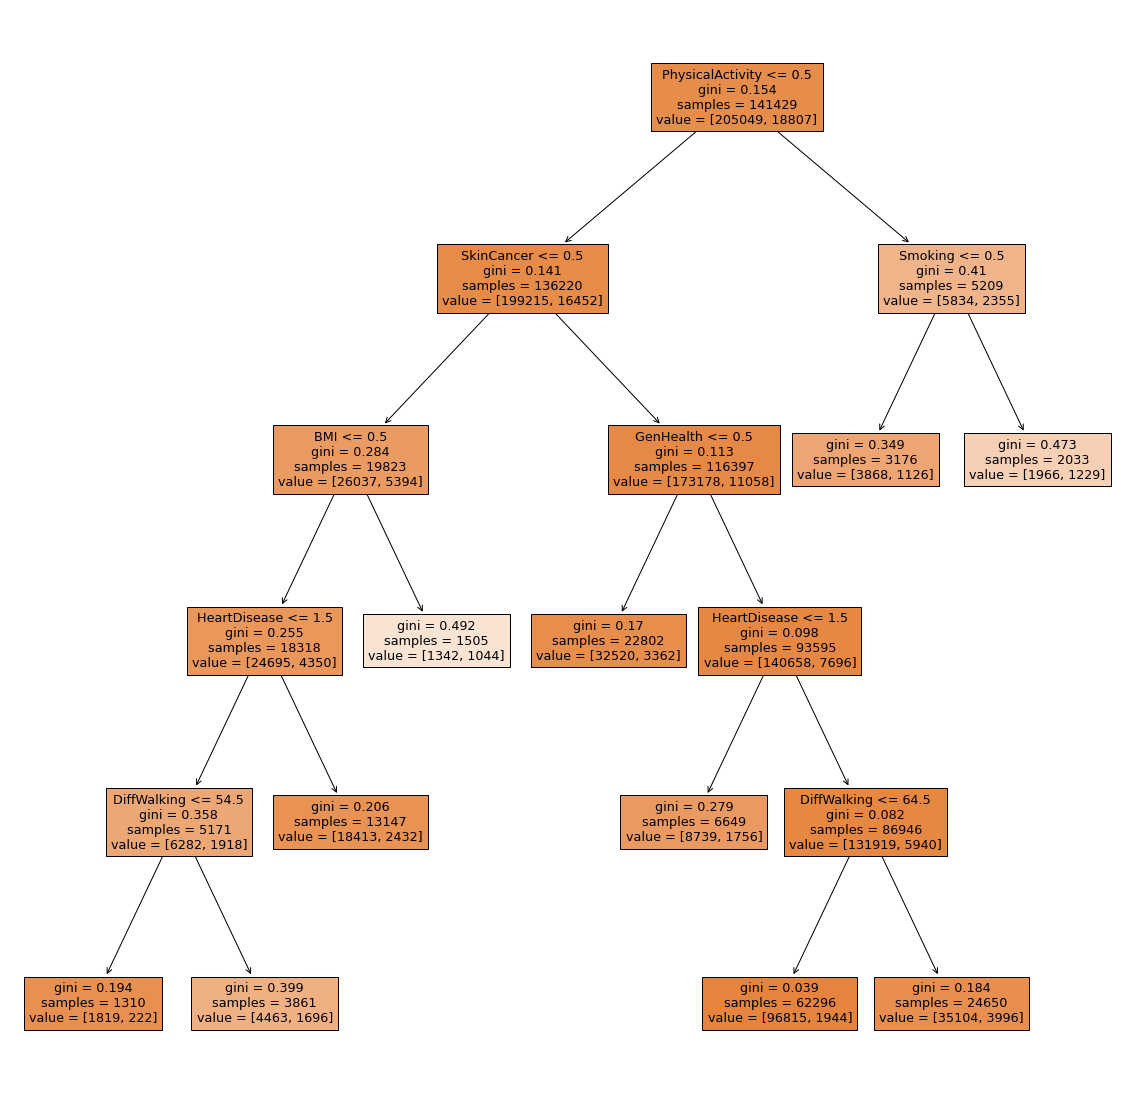

In [8]:
import matplotlib.pyplot as plt 
from sklearn import tree

plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=features1, filled=True)

In [9]:
import plotly.express as px
importances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features1)

figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")


figImportance.show()


In [10]:
df_num3 = df_num[['HeartDisease', 'BMI', 'PhysicalHealth',
                    'GenHealth', 'AgeCategory', 'SleepTime', 'Smoking', 'DiffWalking']]
#df_num3['HeartDisease'] = df_num3['HeartDisease'].map(dict(Yes=1, No=0))
#df_num3['Smoking'] = df_num3['Smoking'].map(dict(Yes=1, No=0))
#df_num3['DiffWalking'] = df_num3['DiffWalking'].map(dict(Yes=1, No=0))

In [11]:
df_num3

,HeartDisease,BMI,PhysicalHealth,GenHealth,AgeCategory,SleepTime,Smoking,DiffWalking
0,0,16.60,3.0,3.0,57.0,5.0,1,0
1,0,20.34,0.0,3.0,80.0,7.0,0,0
2,0,26.58,20.0,1.0,67.0,8.0,1,0
3,0,24.21,0.0,2.0,77.0,6.0,0,0
4,0,23.71,28.0,3.0,42.0,8.0,0,1
...,...,...,...,...,...,...,...,...
319790,1,27.41,7.0,1.0,62.0,6.0,1,1
319791,0,29.84,0.0,3.0,37.0,5.0,1,0
319792,0,24.24,0.0,2.0,47.0,6.0,0,0
319793,0,32.81,0.0,2.0,27.0,12.0,0,0


In [12]:
X = df_num3.iloc[:, 1:].values
y = df_num3.iloc[:, 0].values

classes1 = np.unique(y)
features = np.unique(df_num3.columns)

#split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


#define Random forest model
model = RandomForestClassifier(n_estimators=500, bootstrap=True, verbose=True, max_leaf_nodes=10)

#fit model on training data
model.fit(X_train, y_train)
estimator = model.estimators_[10]

#Predict test data
predictions = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:   30.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.0s finished


In [13]:
print(confusion_matrix(y_test,predictions, labels=classes))

conf = confusion_matrix(y_test,predictions)
new_conf = pd.DataFrame(conf, columns=classes, index=classes)

print(classification_report(y_test,predictions, zero_division=0))
print(accuracy_score(y_test, predictions))

[[87730     0]
 [ 8209     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     87730
           1       0.00      0.00      0.00      8209

    accuracy                           0.91     95939
   macro avg       0.46      0.50      0.48     95939
weighted avg       0.84      0.91      0.87     95939

0.914435214042256


In [14]:
import plotly.express as px
features1 = np.unique(df_num3.columns)[1:]
#features1
importances = model.feature_importances_
#std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
forest_importances = pd.Series(importances, index=features1)

figImportance = px.bar(forest_importances, title="Feature Significance", 
                     template="plotly_white", height=800).update_xaxes(categoryorder="total descending")


figImportance.show()


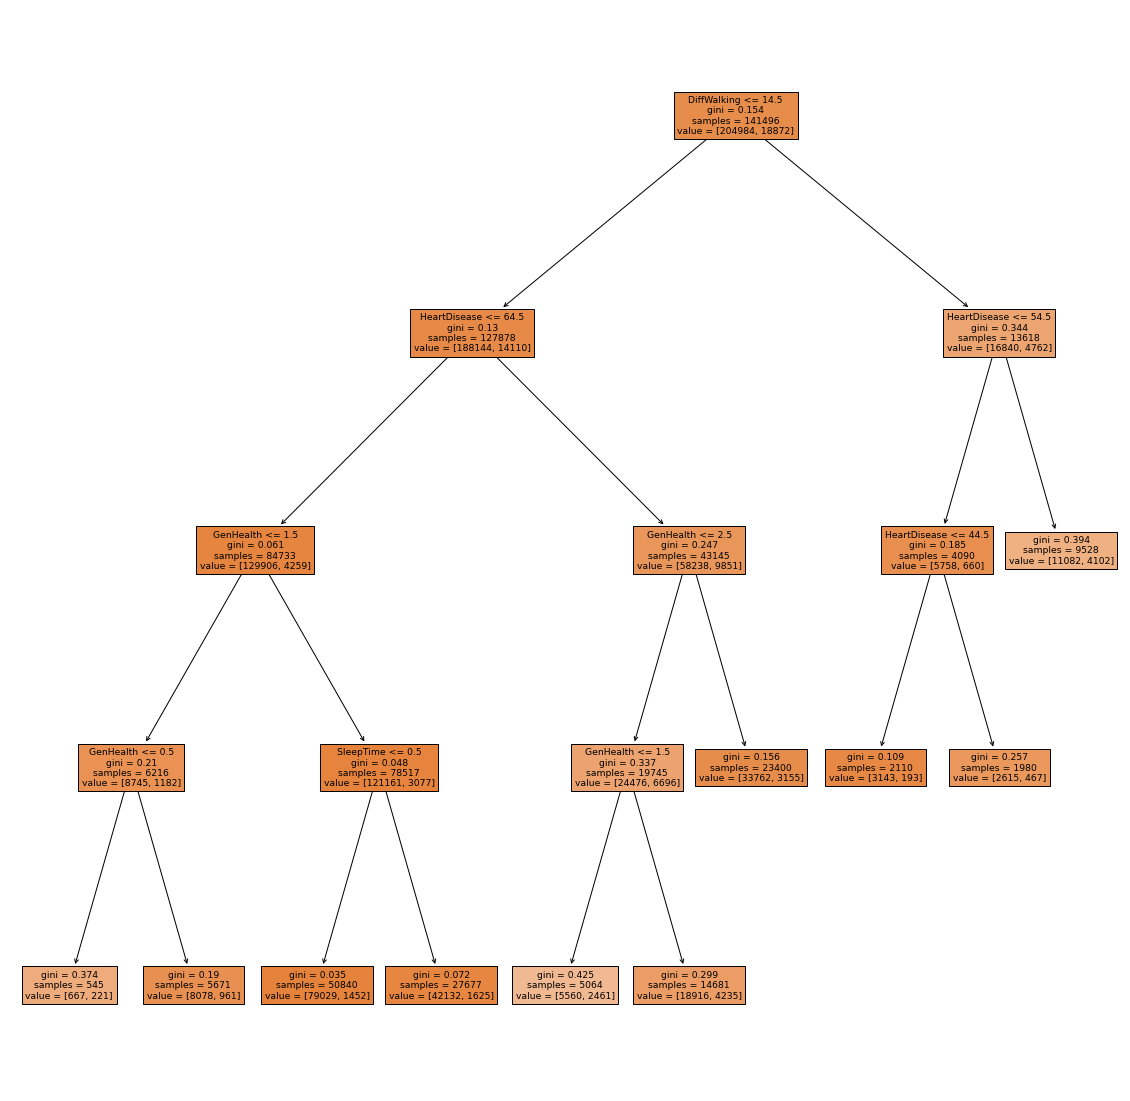

In [15]:
plt.figure(figsize=(20,20))
_ = tree.plot_tree(model.estimators_[0], feature_names=features1, filled=True)